In [5]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load dataset dari file Excel
file_path = '/content/data.xlsx'

# Pastikan file ada di lokasi yang sesuai
df = pd.read_excel(file_path)

# Tampilkan data untuk memastikan semuanya terbaca dengan benar
print(df.head())


   aturan_ke hargatanah(C1) jarakdaripusatkota(C2) adaangkutanumum(C3)  \
0          1          murah                  dekat               tidak   
1          2         sedang                  dekat               tidak   
2          3          mahal                  dekat               tidak   
3          4          mahal                   jauh               tidak   
4          5          mahal                 sedang               tidak   

  dipilihanuntukperumahan(C4)  
0                          ya  
1                          ya  
2                          ya  
3                       tidak  
4                       tidak  


In [10]:
# Inisialisasi LabelEncoder
ncoder = LabelEncoder()

# Terapkan LabelEncoder ke semua kolom kategori
encoded_df = df.apply(lambda col: ncoder.fit_transform(col) if col.dtypes == 'object' else col)

# Tampilkan data yang sudah di-encode
print(encoded_df.head())


   aturan_ke  hargatanah(C1)  jarakdaripusatkota(C2)  adaangkutanumum(C3)  \
0          1               1                       0                    1   
1          2               2                       0                    1   
2          3               0                       0                    1   
3          4               0                       1                    1   
4          5               0                       2                    1   

   dipilihanuntukperumahan(C4)  
0                            1  
1                            1  
2                            1  
3                            0  
4                            0  


In [11]:
# Pisahkan fitur (X) dan target (y)
X = encoded_df.iloc[:, 1:-1]  # Semua kolom kecuali kolom pertama dan terakhir
y = encoded_df.iloc[:, -1]   # Kolom terakhir sebagai target

# Tampilkan dimensi data untuk verifikasi
print("Dimensi X:", X.shape)
print("Dimensi y:", y.shape)


Dimensi X: (10, 3)
Dimensi y: (10,)


In [12]:
# Bagi data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan dimensi dari setiap dataset
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)


Dimensi X_train: (8, 3)
Dimensi X_test: (2, 3)
Dimensi y_train: (8,)
Dimensi y_test: (2,)


In [13]:
# Inisialisasi Gaussian Naive Bayes
nb_classifier = GaussianNB()

# Latih model
nb_classifier.fit(X_train, y_train)

# Tampilkan hasil pelatihan
print("Model telah dilatih.")


Model telah dilatih.


In [14]:
# Prediksi data testing
y_pred = nb_classifier.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasil prediksi dan akurasi
print("Labels Asli (y_test):", y_test.values)
print("Prediksi Model (y_pred):", y_pred)
print("Akurasi Model:", accuracy)


Labels Asli (y_test): [0 1]
Prediksi Model (y_pred): [0 1]
Akurasi Model: 1.0


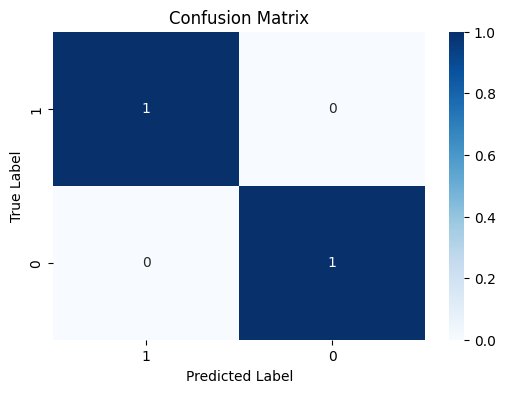

In [15]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


<ipython-input-16-949c679cf11e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette='viridis')


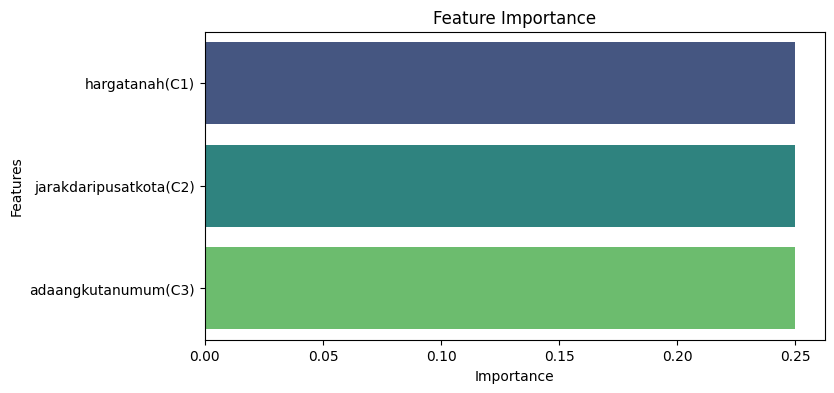

In [16]:
# Hitung feature importance
feature_importance = abs(nb_classifier.theta_[1] - nb_classifier.theta_[0])
feature_names = X.columns

# Visualisasikan feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
